In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#read data
df=pd.read_csv('911.csv')

In [3]:
#display data
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
#info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [6]:
#create reason column of 911 calls
df['reason']=df['title'].apply(lambda x:x.split(':')[0])

In [7]:
df['reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: reason, dtype: object

In [8]:
#diffrent reasons
df['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [9]:
#count of each reason
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

In [10]:
#nearly 50% calls were for emergency services
df['reason'].value_counts(normalize=True)*100

EMS        49.126563
Traffic    35.877256
Fire       14.996181
Name: reason, dtype: float64

In [73]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [11]:
#data type of timeStamp object
type(df['timeStamp'].iloc[0])

str

In [12]:
#convert str type of time into datetime type
df['time']=pd.to_datetime(df['timeStamp'])

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01


In [14]:
#some visualizations

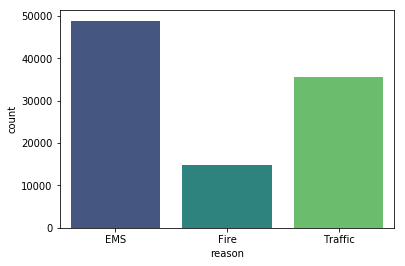

In [15]:
sns.countplot(x='reason',data=df,palette='viridis')

In [16]:
#create seperate Month,hour,day column
df['month']=df['time'].apply(lambda x : x.month)
df['hour']=df['time'].apply(lambda x : x.hour)
df['day']=df['time'].apply(lambda x : x.dayofweek)
df['Date']=df['time'].apply(lambda x : x.date())

In [17]:
df['Date'].head(2)

0    2015-12-10
1    2015-12-10
Name: Date, dtype: object

In [18]:
df['day'].head()

0    3
1    3
2    3
3    3
4    3
Name: day, dtype: int64

In [19]:
d={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day']=df['day'].map(d)

In [20]:
df['day'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: day, dtype: object

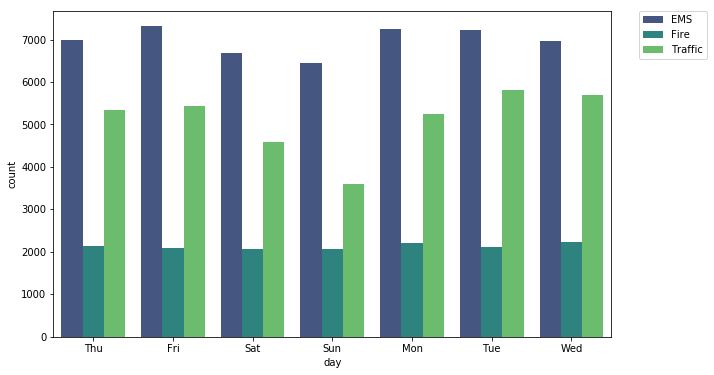

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='day',hue='reason',palette='viridis',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

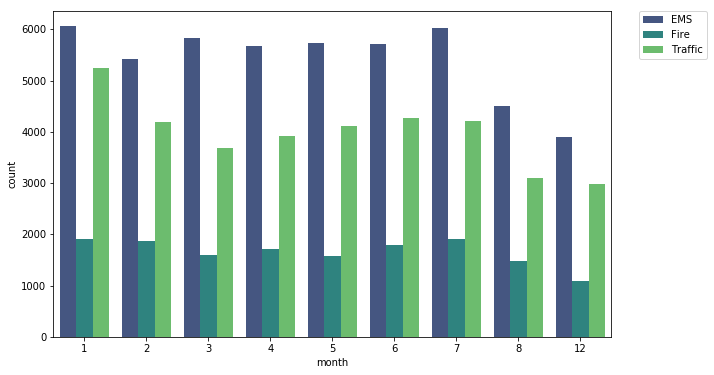

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='month',hue='reason',palette='viridis',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [23]:
#group the data by month
bymonth=df.groupby('month').count()

In [24]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,time,hour,day,Date
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423


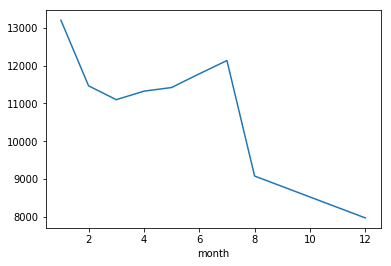

In [25]:
bymonth['lat'].plot()

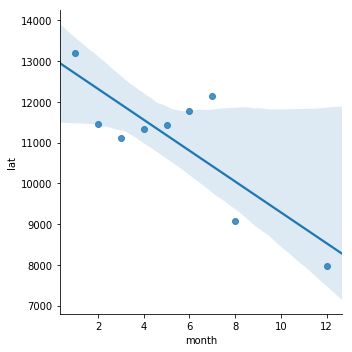

In [26]:
sns.lmplot(x='month',y='lat',data=bymonth.reset_index())

In [27]:
bydate=df.groupby('Date').count()

In [28]:
bydate.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,time,month,hour,day
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403


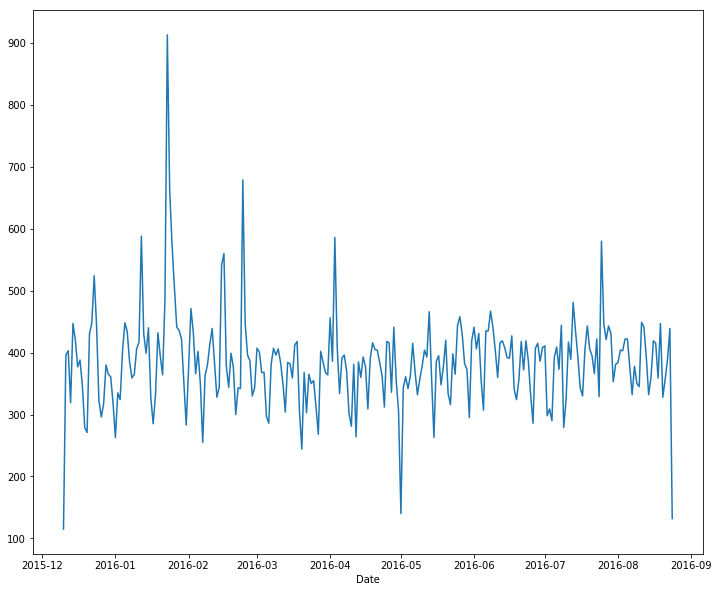

In [29]:
plt.figure(figsize=(12,10))
bydate['lat'].plot()

Text(0.5,1,'EMS')

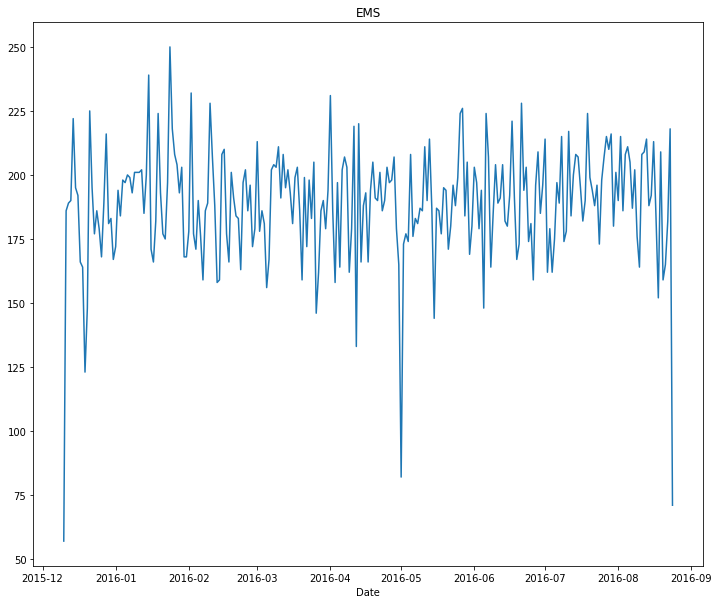

In [30]:
plt.figure(figsize=(12,10))
df[df['reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')

Text(0.5,1,'Traffic')

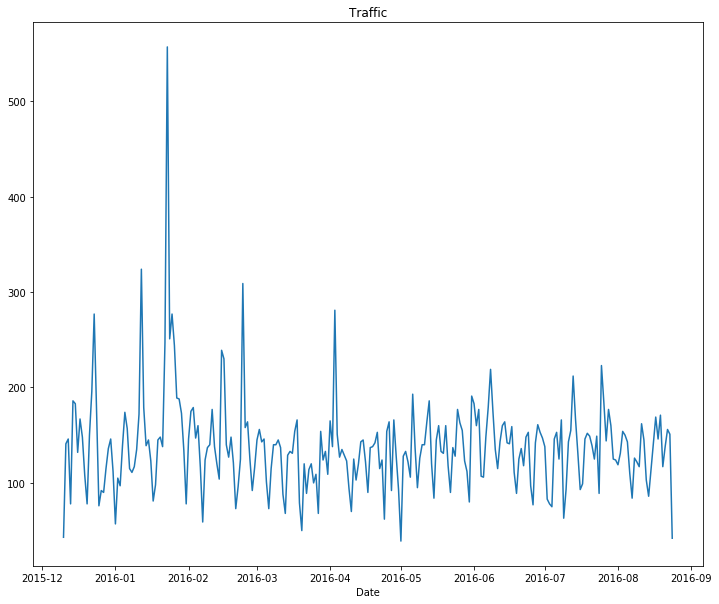

In [31]:
plt.figure(figsize=(12,10))
df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')

Text(0.5,1,'Fire')

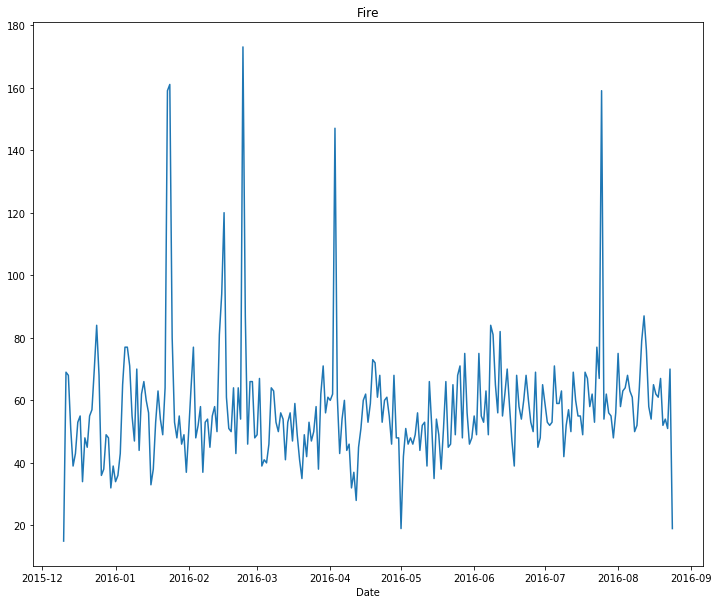

In [32]:
plt.figure(figsize=(12,10))
df[df['reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title("Fire")

In [33]:
df['title'].value_counts().head()

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

In [34]:
#create column for actual reason
df['rtype']=df['title'].apply(lambda x : x.split(':')[1])

In [35]:
df['rtype'].head(3)

0      BACK PAINS/INJURY
1     DIABETIC EMERGENCY
2          GAS-ODOR/LEAK
Name: rtype, dtype: object

In [36]:
#top five reason for call
df['rtype'].value_counts().head()

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
Name: rtype, dtype: int64

In [37]:
#nearly 23% of calls for vehical accident cause
pr=df['rtype'].value_counts(normalize=True)*100
pr.head()

 VEHICLE ACCIDENT -       23.183774
 DISABLED VEHICLE -        7.741326
 VEHICLE ACCIDENT          5.601455
 FIRE ALARM                5.538134
 RESPIRATORY EMERGENCY     5.138102
Name: rtype, dtype: float64

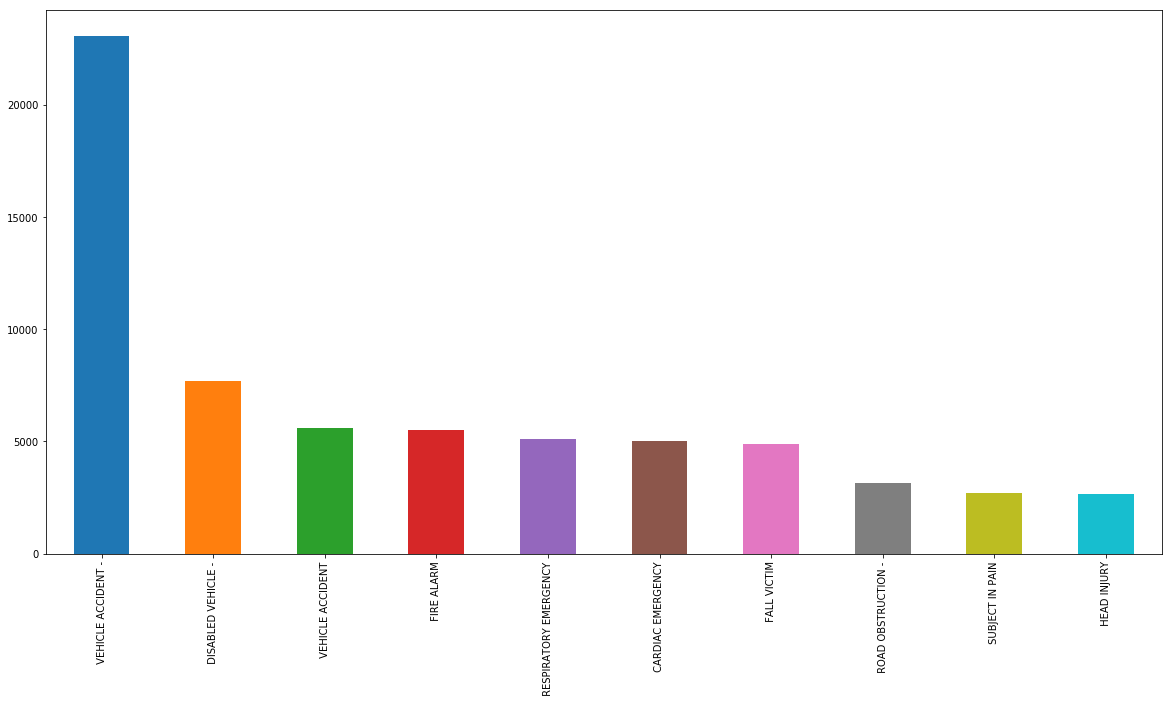

In [74]:
#bar plot of top 10 reasons for call
plt.figure(figsize=(20,10))
df['rtype'].value_counts().iloc[:10].plot.bar()

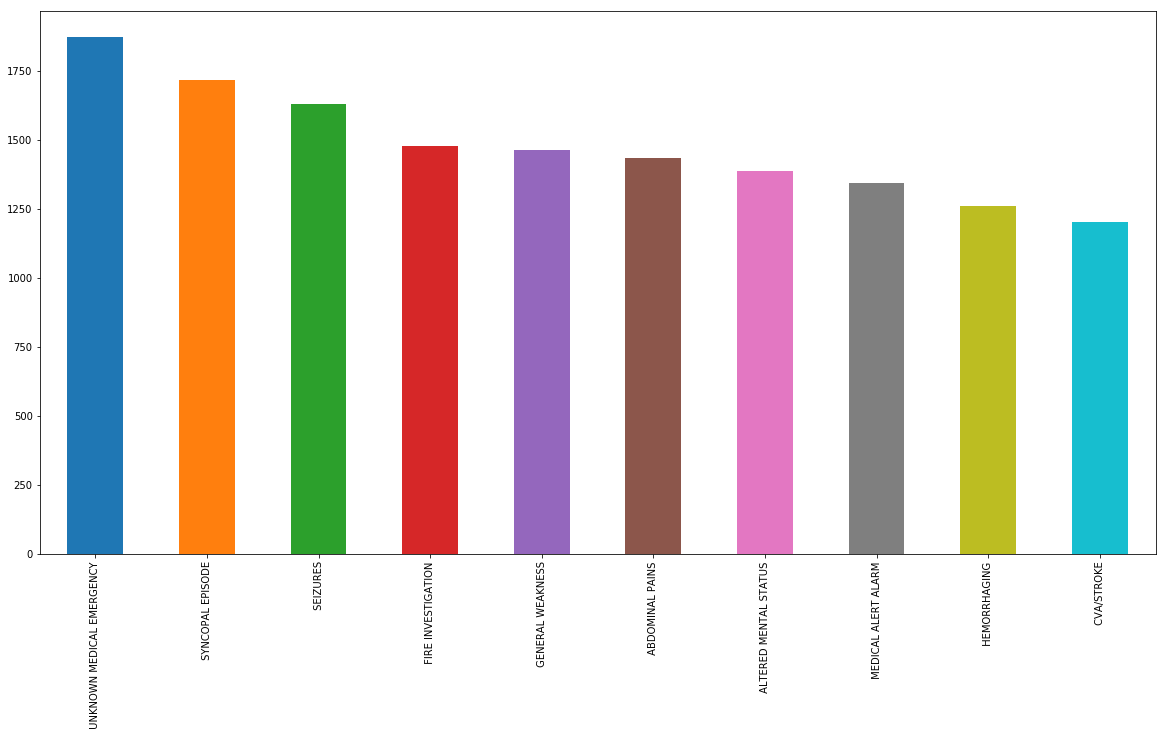

In [39]:
#bar plot for next 10 reason for call
plt.figure(figsize=(20,10))
df['rtype'].value_counts().iloc[10:20].plot.bar()

In [40]:
df[['month','hour','day','Date']].head()

,month,hour,day,Date
0,12,17,Thu,2015-12-10
1,12,17,Thu,2015-12-10
2,12,17,Thu,2015-12-10
3,12,17,Thu,2015-12-10
4,12,17,Thu,2015-12-10


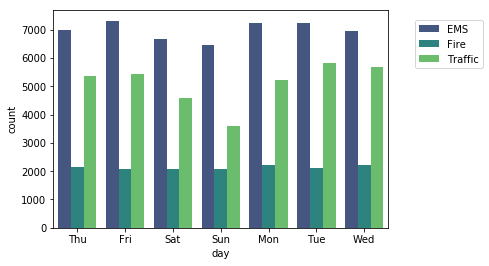

In [41]:
sns.countplot(x='day',hue='reason',palette='viridis',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=1.)

In [42]:
df['day'].value_counts().head()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Name: day, dtype: int64

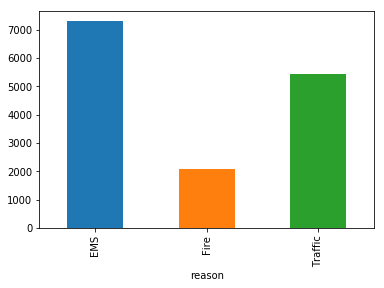

In [43]:
#numbers of EMS,Fire,Traffic calls on friday
df[df['day']=='Fri'].groupby('reason').count()['lat'].plot.bar()

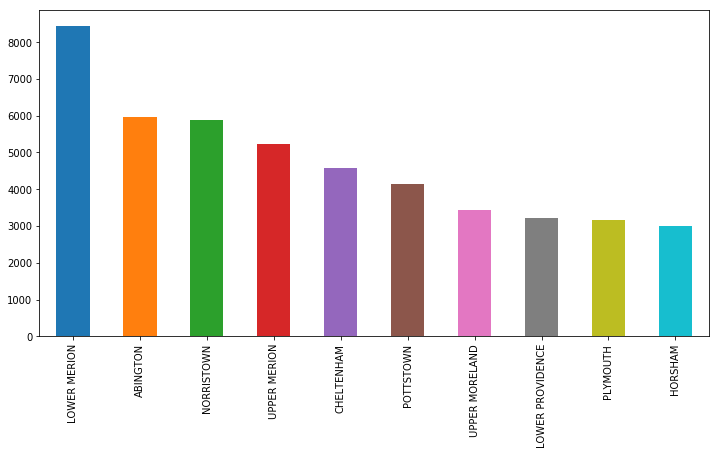

In [46]:
#number of calls from top 10 townships
plt.figure(figsize=(12,6))
df['twp'].value_counts().iloc[:10].plot.bar()

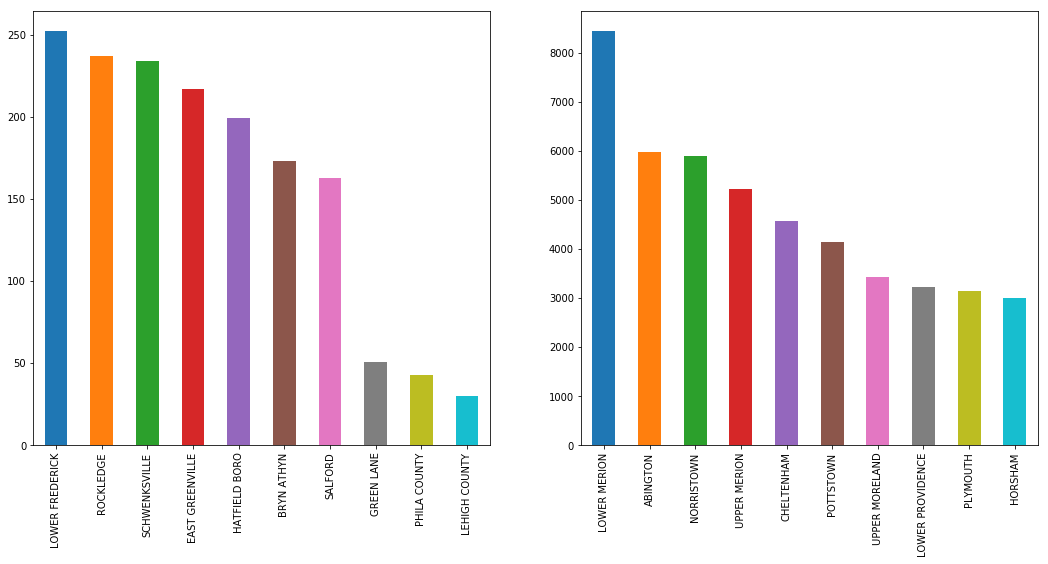

In [51]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['twp'].value_counts().iloc[-10:].plot.bar(ax=ax[0])
df['twp'].value_counts().iloc[:10].plot.bar(ax=ax[1])

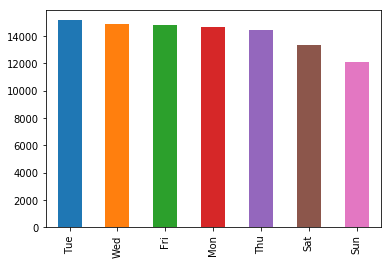

In [52]:
#number of calls on each dayofweek 
#tuesday recieved max number of calls
df['day'].value_counts().plot.bar()

In [68]:
df['hour'].unique()

array([17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
       10, 11, 12, 13, 14, 15, 16], dtype=int64)

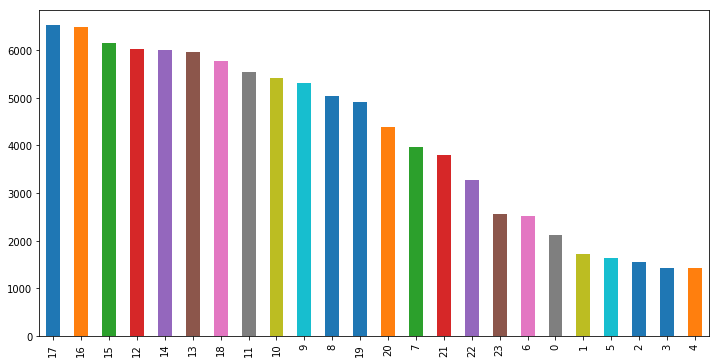

In [58]:
#number of call recieved at diffrent hours
plt.figure(figsize=(12,6))
df['hour'].value_counts().plot.bar()

In [72]:
df[df['hour']==17].count().iloc[0]

6517

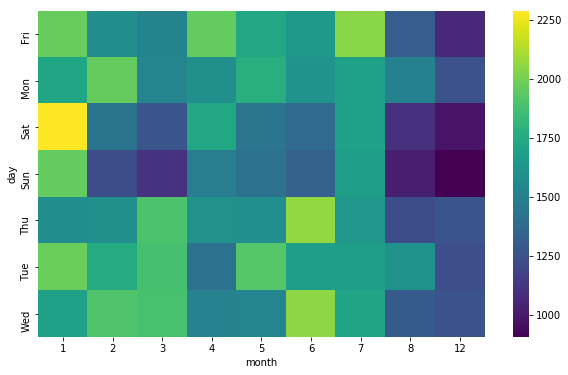

In [80]:
plt.figure(figsize=(10,6))
bymonth=df.groupby(by=['day','month']).count()['reason'].unstack()
sns.heatmap(bymonth,cmap='viridis',cbar=True)

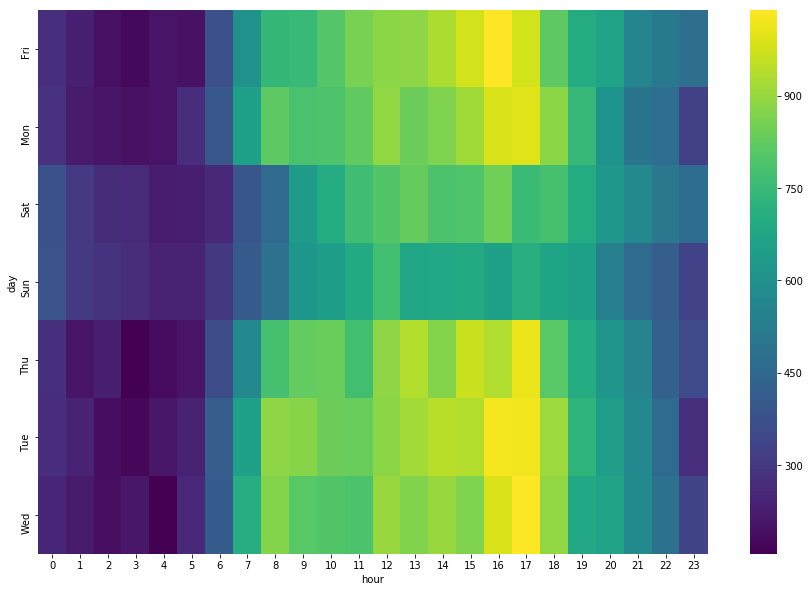

In [86]:
plt.figure(figsize=(15,10))
byhour=df.groupby(by=['day','hour']).count()['lat'].unstack()
sns.heatmap(byhour,cbar=True,cmap='viridis')